<a href="https://colab.research.google.com/github/doyotteee/Aplikasi-Login/blob/main/autism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# --- Step 1: Install dan Import Library ---
!pip install pandas matplotlib seaborn scikit-learn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from google.colab import files
import numpy as np

In [ ]:
# --- Step 2: Upload Dataset ---
uploaded = files.upload()

Saving Autism_Screening_Data_Combined.csv to Autism_Screening_Data_Combined (1).csv


In [ ]:
# --- Step 3: Load dan Cek Dataset ---
df = pd.read_csv('Autism_Screening_Data_Combined.csv')
print(df.head())
print(df.info())
print(df.isnull().sum())

   A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age Sex Jauundice Family_ASD Class
0   1   1   0   1   0   0   1   1   0    0   15   m        no         no    NO
1   0   1   1   1   0   1   1   0   1    0   15   m        no         no    NO
2   1   1   1   0   1   1   1   1   1    1   15   f        no        yes   YES
3   1   1   1   1   1   1   1   1   0    0   16   f        no         no   YES
4   1   1   1   1   1   1   1   1   1    1   15   f        no         no   YES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6075 entries, 0 to 6074
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   A1          6075 non-null   int64 
 1   A2          6075 non-null   int64 
 2   A3          6075 non-null   int64 
 3   A4          6075 non-null   int64 
 4   A5          6075 non-null   int64 
 5   A6          6075 non-null   int64 
 6   A7          6075 non-null   int64 
 7   A8          6075 non-null   int64 
 8   A9          60

In [ ]:
# --- Step 4: Encoding Kolom Kategorikal ---
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # Male=1, Female=0
df['Jauundice'] = le.fit_transform(df['Jauundice'])  # Yes=1, No=0
df['Family_ASD'] = le.fit_transform(df['Family_ASD'])  # Yes=1, No=0
df['Class'] = le.fit_transform(df['Class'])  # ASD=1, NO=0

In [ ]:
# --- Step 5: Pisahkan fitur dan label ---
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
# --- Step 7: Inisialisasi Model ---
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=7)
}

In [ ]:
# --- Step 8: Evaluasi Model ---
results = {}

def mean_iou(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TP = cm[1, 1]
    FP = cm[0, 1]
    FN = cm[1, 0]
    return TP / (TP + FP + FN)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    iou = mean_iou(y_test, y_pred)

    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5)

    results[name] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Mean IoU': iou,
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std()
    }

    # Print report
    print(f"=== {name} ===")
    print(f"Accuracy   : {acc:.4f}")
    print(f"Precision  : {prec:.4f}")
    print(f"Recall     : {rec:.4f}")
    print(f"F1 Score   : {f1:.4f}")
    print(f"Mean IoU   : {iou:.4f}")
    print(f"CV Mean    : {cv_scores.mean():.4f}")
    print(f"CV Std     : {cv_scores.std():.4f}")
    print()


=== Logistic Regression ===
Accuracy   : 0.9053
Precision  : 0.8405
Recall     : 0.8474
F1 Score   : 0.8440
Mean IoU   : 0.7300
CV Mean    : 0.8991
CV Std     : 0.0740

=== Random Forest ===
Accuracy   : 0.9901
Precision  : 0.9917
Recall     : 0.9755
F1 Score   : 0.9835
Mean IoU   : 0.9676
CV Mean    : 0.9607
CV Std     : 0.0290

=== Decision Tree ===
Accuracy   : 0.9728
Precision  : 0.9489
Recall     : 0.9619
F1 Score   : 0.9553
Mean IoU   : 0.9145
CV Mean    : 0.9291
CV Std     : 0.0498

=== SVM ===
Accuracy   : 0.9383
Precision  : 0.9479
Recall     : 0.8420
F1 Score   : 0.8918
Mean IoU   : 0.8047
CV Mean    : 0.9129
CV Std     : 0.0452

=== KNN ===
Accuracy   : 0.9391
Precision  : 0.8547
Recall     : 0.9619
F1 Score   : 0.9051
Mean IoU   : 0.8267
CV Mean    : 0.8711
CV Std     : 0.1298



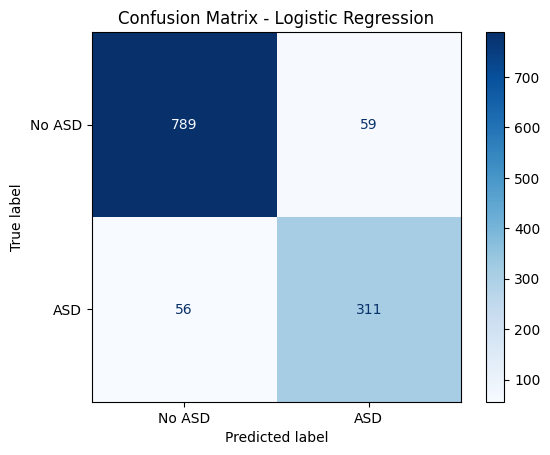

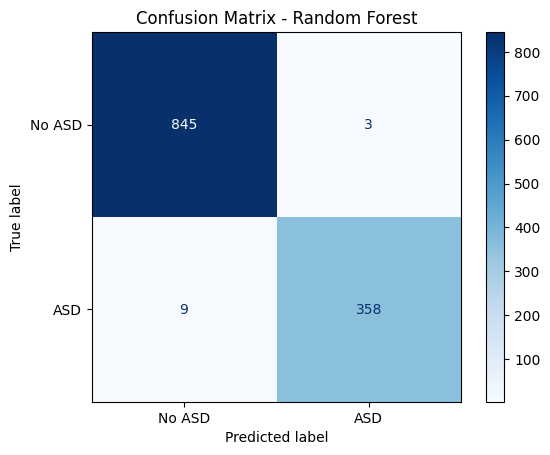

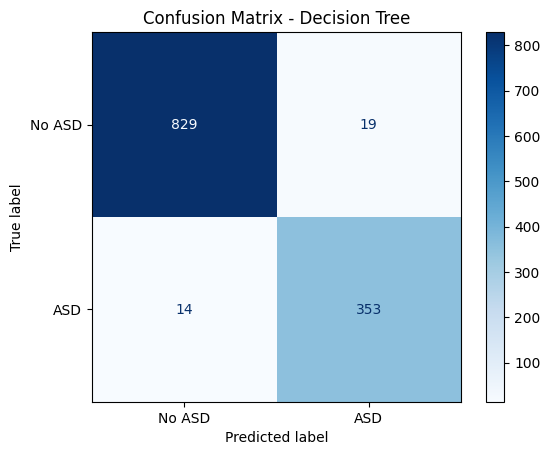

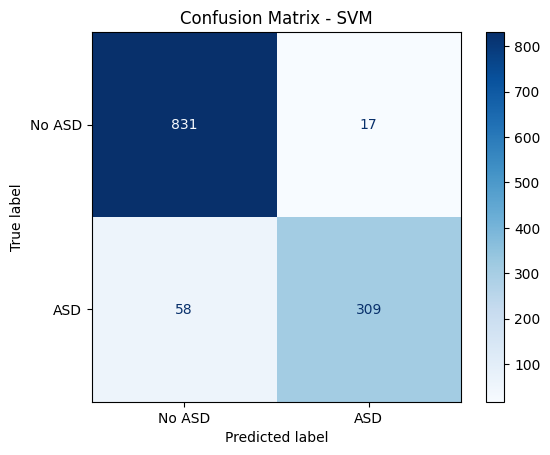

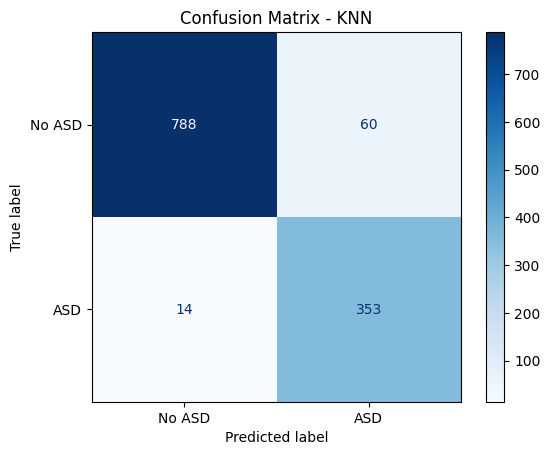

In [ ]:
# --- Step 9: Tampilkan Confusion Matrix ---
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No ASD", "ASD"])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

<ipython-input-26-2054cd3249f1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies, y=model_names, palette='viridis')


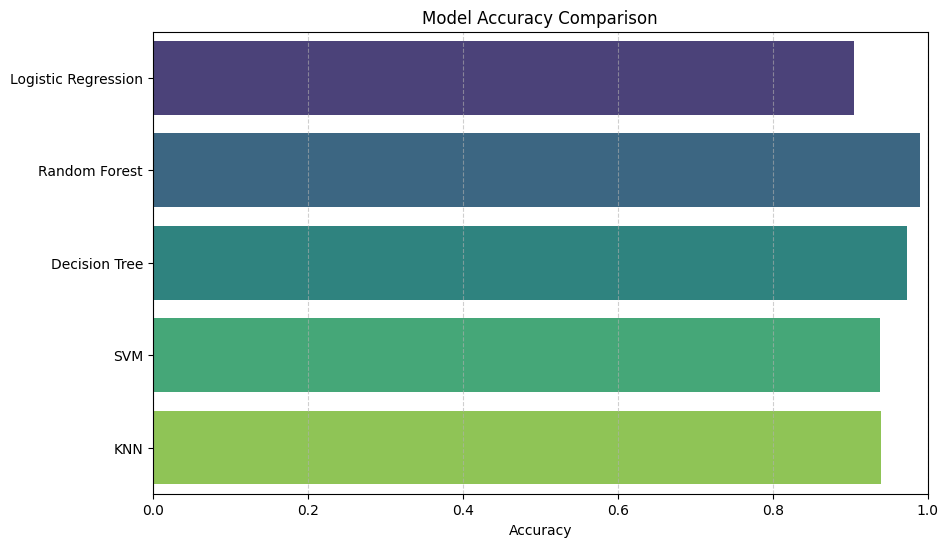

In [ ]:
# --- Step 10: Visualisasi Akurasi ---
model_names = list(results.keys())
accuracies = [results[m]['Accuracy'] for m in model_names]

plt.figure(figsize=(10, 6))
sns.barplot(x=accuracies, y=model_names, palette='viridis')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

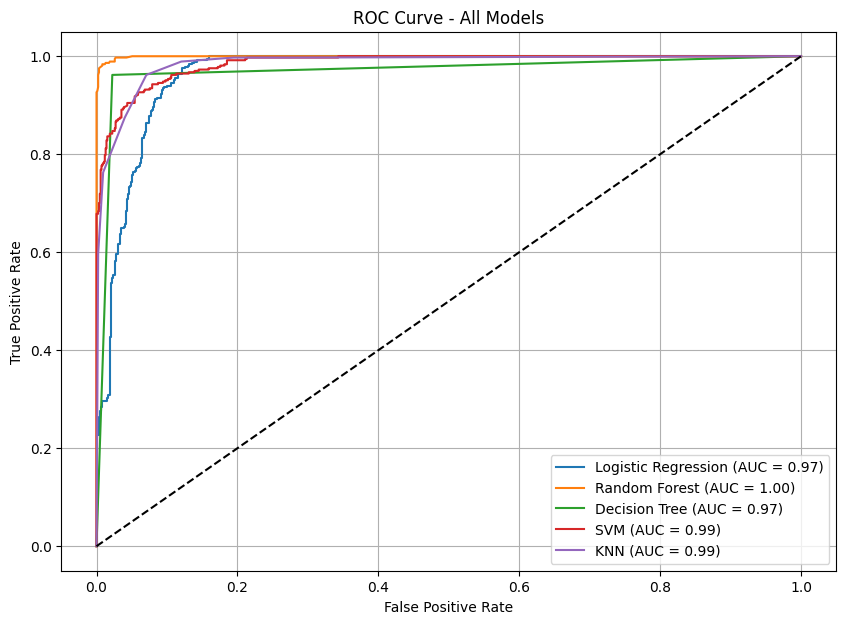

In [ ]:
# --- Step 11: ROC Curve ---
plt.figure(figsize=(10, 7))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - All Models')
plt.legend()
plt.grid(True)
plt.show()
